**SGD**
$$w_{t+1} = w_t - α\nabla L(w_t)$$

**Momentum SGD**
$$V_{t+1} = ρV_t + \nabla L(w_t)$$
$$w_{t+1} = w_t - αV_{t+1}$$

**Nesterov Momentum**
$$V_{t+1} = ρV_t - \nabla L(w_t + ρV_t)$$
$$w_{t+1} = w_t + V_{t+1}$$

**Adagrad**
$$cache_{t+1} = cache_{t} + (\nabla L(w_t))^2$$
$$w_{t+1} = w_t - \alpha \frac{\nabla L(w_t)}{cache_{t+1} + ϵ}$$

**RMSProp**
$$cache_{t+1} = \beta cache_{t} + (1 - \beta)(\nabla L(w_t))^2$$
$$w_{t+1} = w_t - \alpha \frac{\nabla L(w_t)}{cache_{t+1} + ϵ}$$

**Adam (Momentum + RMSProp)**
$$V_{t+1} = \gamma V_t + (1 - \gamma)\nabla L(w_t)$$
$$cache_{t+1} = \beta cache_{t} + (1 - \beta)(\nabla L(w_t))^2$$
$$w_{t+1} = w_t - \alpha \frac{V_{t+1}}{cache_{t+1} + ϵ}$$

### Install required libraries

In [ ]:
!pip3 install plotly
!pip3 install torch
!pip3 install tqdm

 ### import libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as sp
import random
from tqdm import tqdm

## **Simple Train**

## **Linear function approximation**

### Target function

In [ ]:
def target_function(x):
    return 3 * x + 8

### Generating data

In [ ]:
def get_data_sample():
    inp = torch.tensor([np.random.random_sample()])
    target = target_function(inp)
    return inp, target

### Visualize the data

In [ ]:
x = np.linspace(0, 1, 1000)
y = target_function(x)

fig_line_raw = go.Figure()
fig_line_raw.add_trace(go.Scatter(x=x, y=y, mode='lines', name='3x+8'))
fig_line_raw.update_layout(title='Target function', xaxis_title='x', yaxis_title='3x+8')
fig_line_raw.show()

### NN model

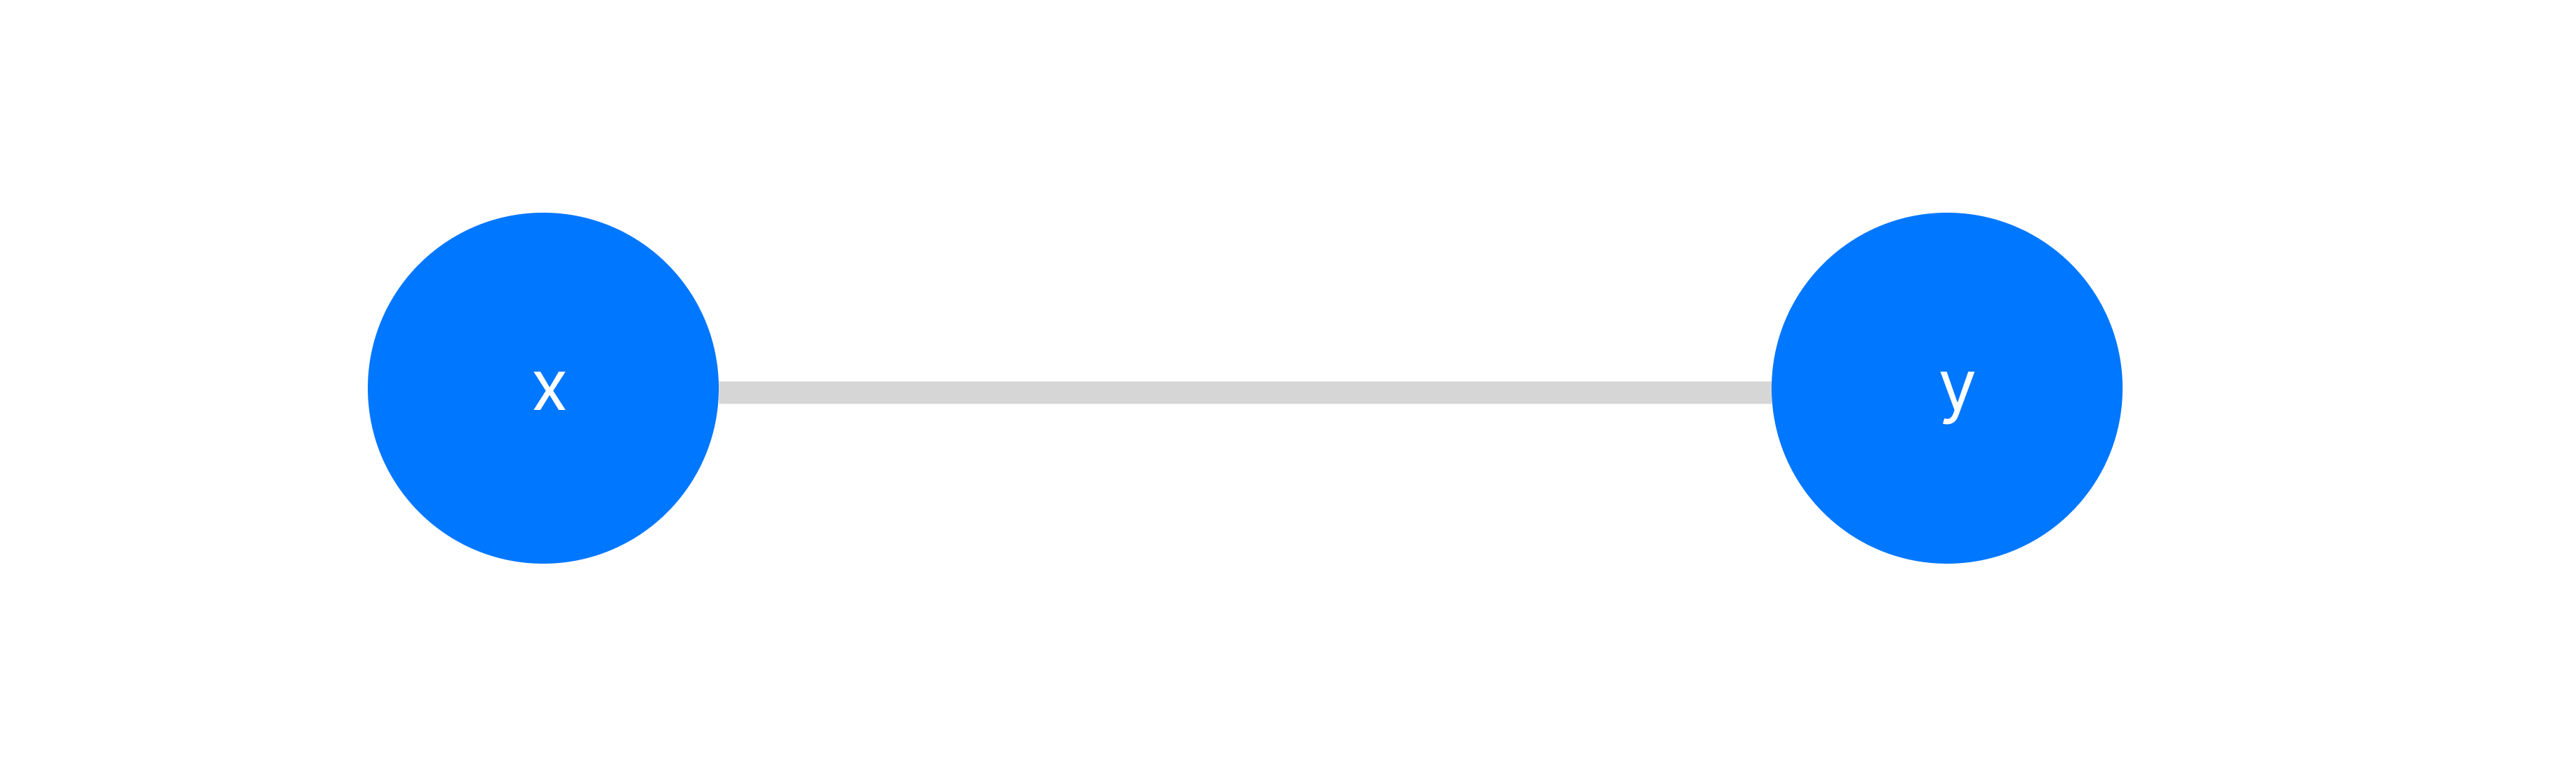

**Barebone Torch**

In [ ]:
iterations = 100
lr = 0.001
w = torch.ones(1, requires_grad = True)
b = torch.ones(1, requires_grad = True)
loss_history = []

for i in range(iterations):
  x, target = get_data_sample()
  prediction = w * x + b
  loss = (prediction - target) ** 2
  loss_history.append(loss.item())
  loss.backward()

  w.data -= lr * w.grad.data
  b.data -= lr * b.grad.data

  w.grad.zero_()
  b.grad.zero_()

  if i % 10 == 0:
    print(f"w = {w.data}, b =  {b.data}")



In [ ]:
x_expanded = np.linspace(0, iterations - 1, iterations)

fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=x_expanded, y=loss_history, mode='lines'))
fig_line.update_layout(title='Loss', xaxis_title='iteration', yaxis_title='loss')
fig_line.show()

**nn.Module Torch**

In [ ]:
class NeuronNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.fc1(x)
        return x

In [ ]:
net = NeuronNet()
print(net)
print()

#let us print the parameters of the model
print("INITIAL PARAMETERS OF THE MODEL:")
for param in net.parameters():
    print(param)

### Loss function and Optimizer

In [ ]:
criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

### Train Loop

In [ ]:
iterations_num = 100

for i in range(iterations_num):
    inp, target = get_data_sample()
    optimizer.zero_grad() # weights.grad.data.zero_()

    outputs = net(inp)
    loss = criterion(outputs, target)
    loss_val = loss.item()
    if (i % 30 == 0):
        print(f"EPOCH: {i}. Parameters of the model:")
        for param in net.parameters():
            print(f"  {param}")

        print()
        print(f" Current loss: {loss_val}")
        print()

    loss.backward()   # calculating gradients
    optimizer.step()  # weights.data -= lr * dL/dW

    if (i % 30 == 0):
        for param in net.parameters():
            print(f"Parameter change: {param.grad * learning_rate}")
            print(f"Result:\n  {param}")
            print()
        print()
        print()

print('TRAINING FINISHED')
print(f"EPOCH: {i}. Parameters of the model:")
for param in net.parameters():
    print(param)

print()
print(f"Current loss: {loss_val}")
print()
print()

### Testing the result

#### Testing on dataset

In [ ]:

for i in range(5):
    inp, target = get_data_sample()
    outputs = net(inp)
    loss = criterion(outputs, target)
    print(f"INPUT: {inp.item()}, OUTPUT: {outputs.item()}, TARGET: {target.item()}\n LOSS: {loss}\n")

#### Testing far from dataset

In [ ]:

for i in range(5):
    # change x to be 100x more than in the dataset
    inp = torch.tensor([100 * np.random.random_sample()])
    target = target_function(inp)
    outputs = net(inp)
    loss = criterion(outputs, target)
    print(f"INPUT: {inp.item()}, OUTPUT: {outputs.item()}, TARGET: {target.item()}\n LOSS: {loss}\n")

### Visualize the result

In [ ]:
x_expanded = np.linspace(-100, 100, 1000)
y_target = target_function(x_expanded)
y_predicted = net(torch.tensor(x_expanded, dtype=torch.float32).view(-1, 1)).flatten().detach().numpy()

fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=x_expanded, y=y_target, mode='lines', name='3x+8'))
fig_line.add_trace(go.Scatter(x=x_expanded, y=y_predicted, mode='lines', name='net'))
fig_line.update_layout(title='Target and Prediction', xaxis_title='x', yaxis_title='y')
fig_line.show()

## **Multiple variables Linear function approximation**

### Target function

In [ ]:
def target_function(x):
    return torch.tensor([1 * x[0] + 2 * x[1] + 3 * x[2] + 2,
                         5 * x[0] + 7 * x[1] + 9 * x[2] + 3], dtype=torch.float32)

### Generating data

In [ ]:
def get_data_sample():
    inp = torch.rand(3)
    target = target_function(inp)
    return inp, target

### Visualize the data

### NN model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(3, 2)

    def forward(self, x):
        x = self.fc1(x)

        return x

In [ ]:
net = Net()
print(net)
print()

#let us print the parameters of the model
print("INITIAL PARAMETERS OF THE MODEL:")
for param in net.parameters():
    print(param)

### Loss function and Optimizer

In [ ]:
lr = 0.01
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

### Train Loop

In [ ]:
iterations_step = 1000

for i in range(iterations_step):
    inp, target = get_data_sample()

    optimizer.zero_grad()

    outputs = net(inp)
    loss = criterion(outputs, target)

    loss.backward()
    optimizer.step()

    loss_val = loss.item()

    if (i % 100 == 0):
        print(loss_val)

        for param in net.parameters():
            print(param)

        print("")

### Testing the result

#### Testing on dataset

In [ ]:
for i in range(5):
    inp, target = get_data_sample()
    outputs = net(inp)
    loss = criterion(outputs, target)
    print(f"INPUT: {inp}, OUTPUT: {outputs}, TARGET: {target}\n LOSS: {loss}\n")

#### Testing far from dataset

In [ ]:
print("TEST:")

for i in range(5):
    # change x to be 100x more than in the dataset
    inp = torch.rand(3) * 100
    target = target_function(inp)
    outputs = net(inp)
    loss = criterion(outputs, target)
    print(f"INPUT: {inp}, OUTPUT: {outputs}, TARGET: {target}\n LOSS: {loss}\n")

## **Sin function approximation**

### Generating data

In [ ]:
x = np.linspace(0, 2 * np.pi, 1000)
# x = np.linspace(0, 10 * np.pi, 1000)
y = np.sin(x)

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
dataset = [pair for pair in zip(x_tensor, y_tensor)]

### Visualizing data

In [ ]:
fig_sin_raw = go.Figure()
fig_sin_raw.add_trace(go.Scatter(x=x, y=y, mode='lines', name='sin(x)'))
fig_sin_raw.update_layout(title='Target function', xaxis_title='x', yaxis_title='sin(x)')
fig_sin_raw.show()

### Define a simple neural network model

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

### Train

In [ ]:
# Initialize empty traces for sine wave and loss
real_sin_trace = go.Scatter(x=x, y=y, mode='lines', name='Actual sin(x)')
sine_trace = go.Scatter(x=[], y=[], mode='lines', name='Predicted sin(x)')
sin_loss_trace = go.Scatter(x=[], y=[], mode='lines', name='Training Loss')

# Create the neural network model
model = SimpleNN()

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)



# Training loop
num_epochs = 100
losses = []  # Store loss values for plotting
for epoch in tqdm(range(num_epochs), desc="Training Progress"):
    random.shuffle(dataset)
    # Forward pass
    for inp, target in dataset:
        output = model(inp)
        loss = criterion(output, target)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Store the loss value
    losses.append(loss.item())

    # Update sine wave subplot
    sine_trace.x = x_tensor.numpy().flatten()
    predicted = model(x_tensor).detach().numpy()
    sine_trace.y = predicted.flatten()

    # Update loss subplot
    sin_loss_trace.x = list(range(epoch + 1))
    sin_loss_trace.y = losses
print("Training finished")

### Visualize train result

In [ ]:
# Create a Plotly figure with subplots for both plots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("sin(x)", "Training Loss"))

# Update the layout of the figure
fig.update_layout(title_text=f'Epoch {epoch + 1}', showlegend=False)
fig.add_trace(real_sin_trace, row=1, col=1)
fig.add_trace(sine_trace, row=1, col=1)
fig.add_trace(sin_loss_trace, row=1, col=2)
fig.show()

In [ ]:
x_expanded = np.linspace(-10 * np.pi, 10 * np.pi, 1000)
y_target = np.sin(x_expanded)
y_predicted = model(torch.tensor(x_expanded, dtype=torch.float32).view(-1, 1)).flatten().detach().numpy()

fig_sin = go.Figure()
fig_sin.add_trace(go.Scatter(x=x_expanded, y=y_target, mode='lines', name='sin(x)'))
fig_sin.add_trace(go.Scatter(x=x_expanded, y=y_predicted, mode='lines', name='net'))
fig_sin.update_layout(title='Target and Prediction', xaxis_title='x', yaxis_title='y')
fig_sin.show()

## **Sphere Surface Approximation**

### Generating data

In [ ]:
# Generate training data for points inside and outside the sphere
num_points = 1000
inside_points = np.random.rand(num_points, 3) * 2 - 1  # Random points in [-1, 1] range
inside_labels = np.linalg.norm(inside_points, axis=1) < 1  # 1 inside, 0 outside

# Convert data to PyTorch tensors
x_tensor = torch.tensor(inside_points, dtype=torch.float32)
y_tensor = torch.tensor(inside_labels, dtype=torch.float32).view(-1, 1)

### NN model

In [ ]:
# Define a simple neural network model
class SphereApproximationNN(nn.Module):
    def __init__(self):
        super(SphereApproximationNN, self).__init__()
        self.fc1 = nn.Linear(3, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.sigmoid(x)

### Training

In [ ]:
# Create the neural network model
model = SphereApproximationNN()

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
iterations_num = 1000

for epoch in range(iterations_num):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

### Visualization of results

In [ ]:
import matplotlib.pyplot as plt

import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Generate points on a grid to visualize the learned sphere
grid_points = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
grid_points = np.stack(grid_points, axis=-1).reshape(-1, 3)
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# Use the trained model to predict if points are inside the sphere
predictions = model(grid_tensor).detach().numpy().flatten()
# Make colors
colors = ('r', 'g')
c_list = []
for i, prediction in enumerate(predictions):
    if prediction < 0.5:
      c_list.extend(['w'])
    else:
      c_list.extend(['k'])

# Plot the surface
ax.scatter(grid_points[:, 0], grid_points[:, 1], zs=grid_points[:, 2], zdir='y', c=c_list, label='points in (x, z)', s = 20)

# Set an equal aspect ratio
ax.set_aspect('equal')

ax.view_init(elev=180, azim=0)

plt.show()
